In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
plt.style.use('ggplot')

In [86]:
df = pd.read_csv('vgsales.csv')
df.dropna(inplace=True)


In [87]:
df['north_america'] = df['NA_Sales'] * 1000000
df['other'] = df['Other_Sales'] * 1000000
df['japan'] = df['JP_Sales' ] * 1000000
df['europe'] = df['EU_Sales'] * 1000000
df['global'] = df['Global_Sales'] * 1000000
df.drop(columns = ['NA_Sales' ,'EU_Sales','JP_Sales','Other_Sales','Global_Sales'],axis=1,inplace=True)

### Global Sales By Year

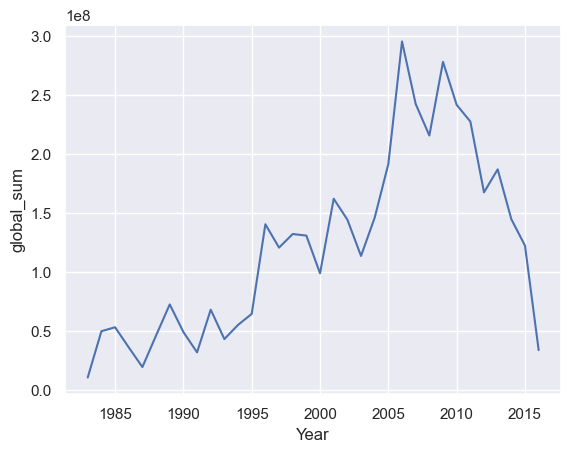

In [163]:
year = df.groupby(['Year']).agg(global_sum=('global', 'sum'))

sns.set_theme(style="darkgrid")
sns.lineplot(x="Year", y="global_sum"
             ,
             data=year)
plt.show()


In [117]:
year = df.groupby(['Year']).agg(global_sum=('global', 'sum'))
fig = px.line(year, 
              x=year.index,
              y="global_sum",
              title='Global Sales By Year',
              markers=True)
fig.show()


### Pairplot

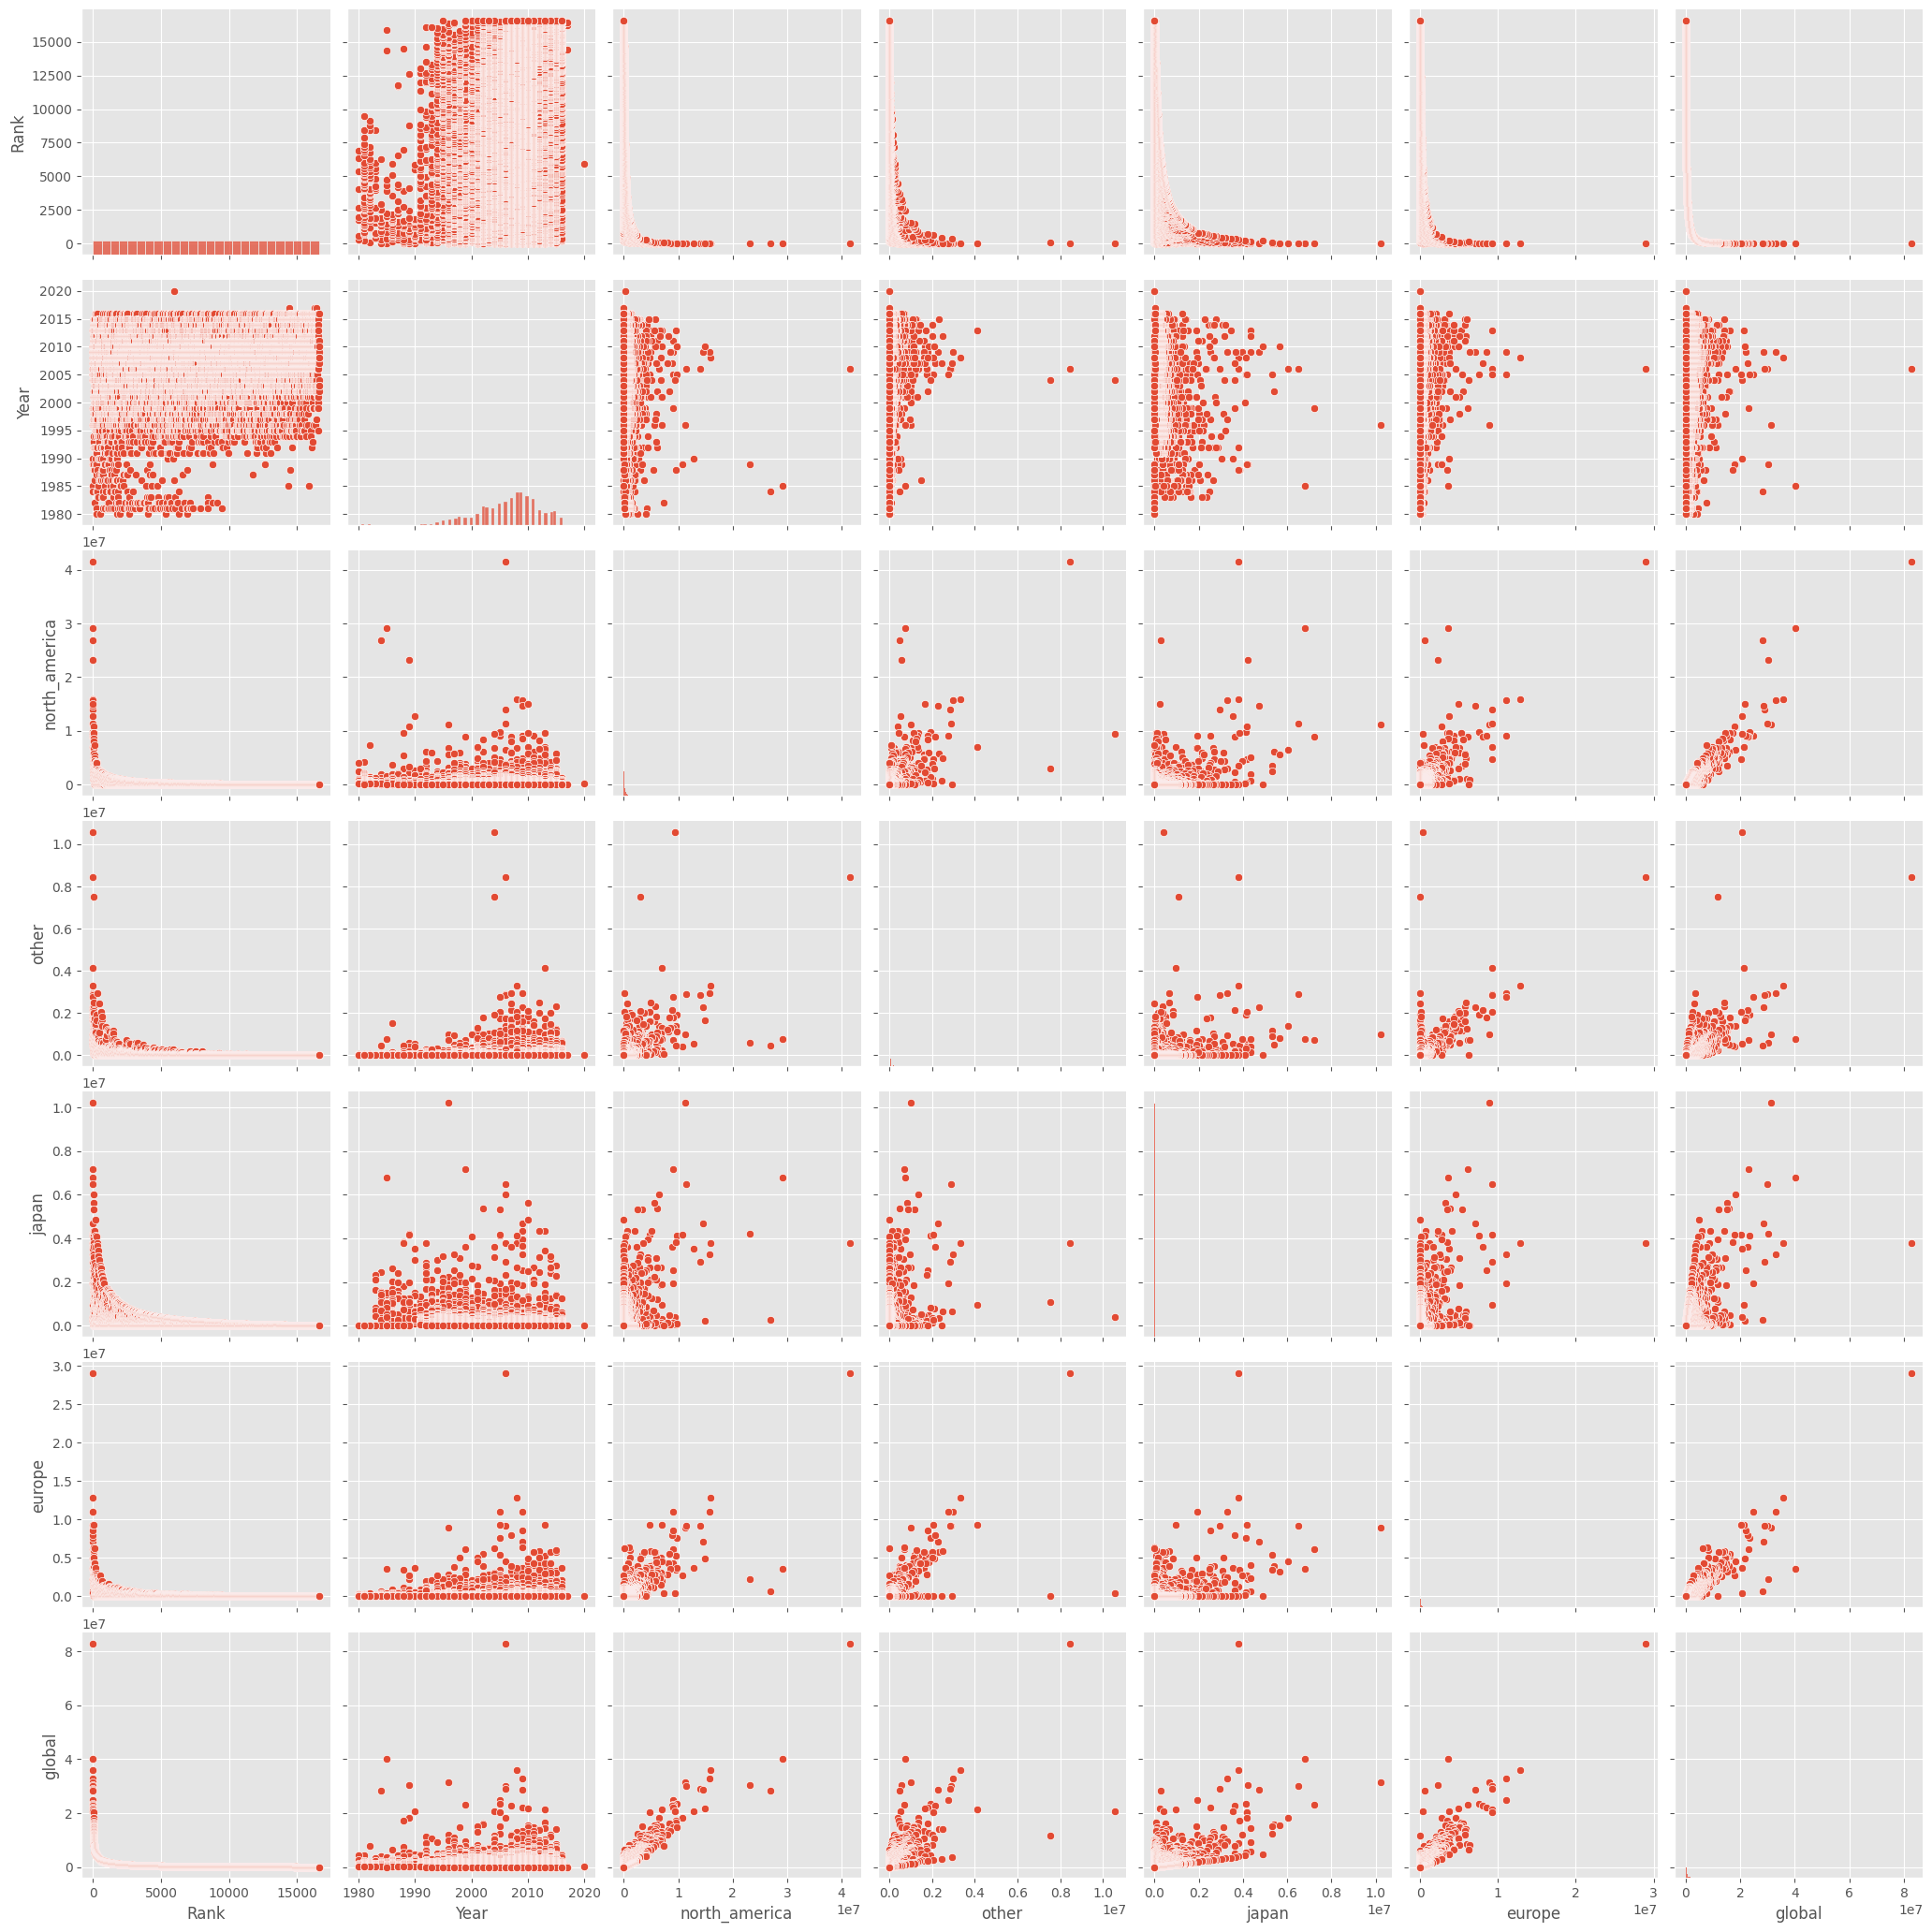

In [88]:
sns.pairplot(df.select_dtypes(['number']),
             height=3,
             aspect=1)
plt.show()

### Global Sales By Year / Bar plot 

In [119]:
year = df.groupby(['Year']).agg(global_sum=('global', 'sum'))

fig = px.bar(year,
             x=year.index, 
             y="global_sum", 
             title='Global Sales By Year',
             color = 'global_sum')
fig.show()

### Platforms with 15000000 sale

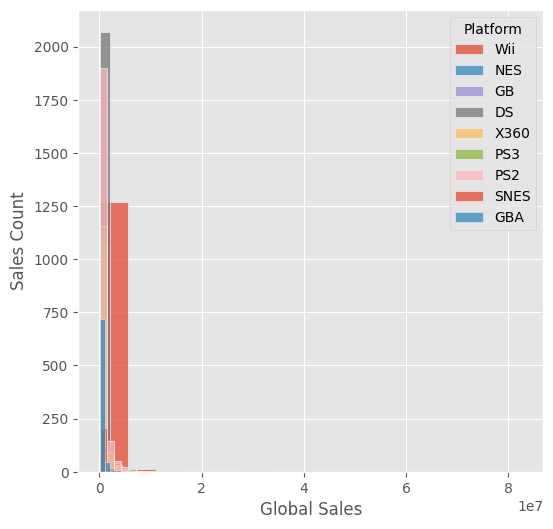

In [90]:

plat = df[df['global'] > 15000000]['Platform'].unique()


plt.subplots(figsize=(6, 6))

for pl in plat:
    data = df[df['Platform'] == pl]
    sns.histplot(data['global'],
                 kde=False,
                 bins=15,
                 label=pl)

plt.xlabel('Global Sales')
plt.ylabel('Sales Count')
plt.legend(title='Platform')
plt.show()

### Most Saled Genres In Japan

In [149]:
l = df.groupby(['Genre']).count()
fig = px.scatter(l, 
                 y=l.index,
                 x='japan',
                 color = 'japan',
                 log_x=True,
                 title=' Most Saled Genres In Japan' )
fig.update_traces(marker=dict(size=12,
                              line=dict(width=1,
                                        color='Black')),
                  selector=dict(mode='markers'))
fig.show()

### Most Saled Genres Global 

In [133]:
genre = df[df["global"] > 50000]
fig = px.sunburst(genre, 
            values='global',
            path=['Genre'],
            hover_name='Genre',
            height=800,
            color='Genre',
            title='Total Sales By Genre',
            )

fig.show()

### Top 6 Most Saled Platform Games 

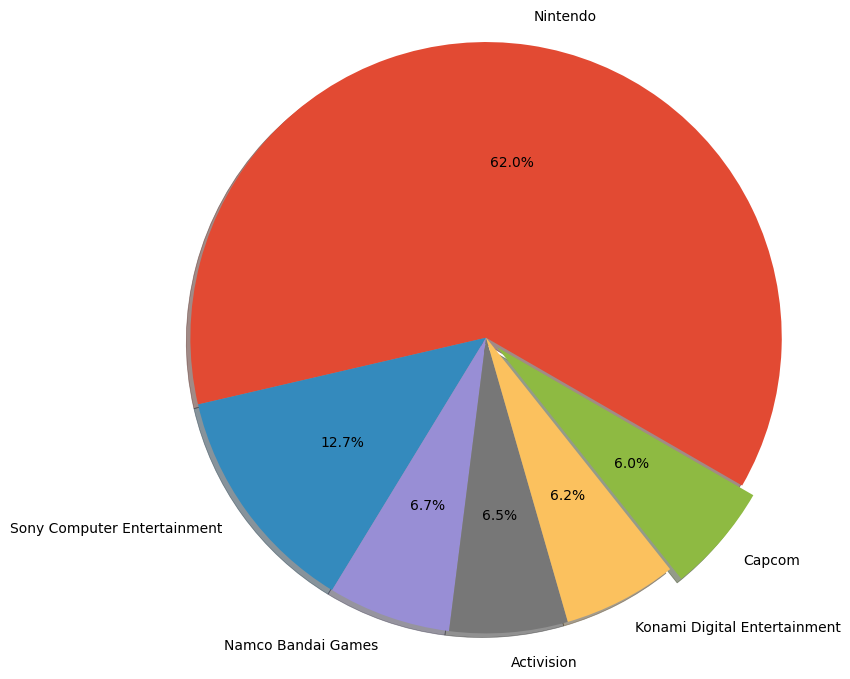

In [108]:
sales = df.groupby('Publisher').agg(global_sum=('global', 'sum')).sort_values('global_sum', ascending=False)

fig, ax = plt.subplots()
explode = (0, 0, 0, 0, 0, 0.1) 
ax.pie(sales['global_sum'][:6],
       labels=sales.index[:6],
       radius=2, 
       autopct='%1.1f%%',
       explode=explode,
       shadow=True,
       startangle=-30)

plt.show()

### Top 6 Most Saled Platform Games 

In [94]:
sales = df.groupby('Publisher').agg(global_sum=('global', 'sum')).sort_values('global_sum', ascending=False)
fig = px.bar(sales['global_sum'][:5],
             x=sales.index[:5],
             y='global_sum',
             color = 'global_sum')
fig.show()


In [150]:
fig = px.histogram(df, 
                   x=df.groupby(['Platform']).sum()['global'], 
                   y=df['Platform'].unique(),
                   color=df.groupby(['Platform']).sum()['global'],
                   marginal='rug')
fig.show()